In [101]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
import os
import glob
import sys
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import glob
import basin_masks
import cartopy as cart
import cartopy.crs as ccrs
notebook_path = os.getcwd()

In [103]:
# setting up a dask LocalCluster
from dask.distributed import Client
from dask.distributed import LocalCluster
cluster = LocalCluster()
client = Client(cluster)
client

ImportError: cannot import name 'validate_key' from 'dask.core' (C:\Users\aline\mambaforge\envs\gtc\Lib\site-packages\dask\core.py)

In [104]:
from os.path import expanduser
user_home_dir = expanduser('~')

sys.path.append(os.path.join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco

In [161]:
DIR = "H:/.shortcut-targets-by-id/1wvJjD0RMTujKYaXQapEiGk-Mx03_KSin/"

parameter = "STRESS" # OBP - SSH - TEMP_SALINITY - STRESS
DATA_DIR = DIR + "GTC/solodoch_data_full/ECCO_L4_OCEAN_3D_VOLUME_FLUX_LLC0090GRID_MONTHLY_V4R4"
SAL_DIR = DIR + f"solodoch_data_full/26N/ECCO_L4_{parameter}_05DEG_MONTHLY_V4R4"

In [175]:
## Load ECCO variables
nc_files = (os.path.join(DATA_DIR, '*.nc'))
ds = xr.open_mfdataset(nc_files, data_vars='minimal',coords='minimal',compat='override')
ds

<xarray.Dataset>
Dimensions:    (tile: 13, j_g: 90, i_g: 90, k_p1: 51, k_l: 50, j: 90, i: 90,
                time: 312, k: 50, nb: 4, k_u: 50, nv: 2)
Coordinates: (12/24)
    XG         (tile, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Zp1        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    Zl         (k_l) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    YC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...         ...
  * k_p1       (k_p1) int32 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * k_u        (k_u) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * nb         (nb) float32 0.0 1.0 2.0 3.0
  * nv         (nv) float32 0.0 1.0
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T06:00:00
Data variables:
    VVELMASS   (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 1, 13, 90, 90), meta=np.ndarray>
    WVELMASS   (time, k_l, tile, j, i) float32 dask.array<chunksize=(1, 1, 13, 90, 90), meta=np.ndarray>
    UVELMASS   (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 1, 13, 90, 90), meta=np.ndarray>
Attributes: (12/63)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Three-Dimensional Volume Flux...
    uuid:                            54fde4fa-4181-11eb-807f-0cc47a3f8057
    history_json:                    [{"$schema":"https:\/\/harmony.earthdata...

In [176]:
ECCO_dir = os.path.join(user_home_dir,'OTP\ECCO_L4_GEOMETRY_LLC0090GRID_V4R4\GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')
print(ECCO_dir)
ecco_grid = xr.open_dataset(ECCO_dir)
ds = xr.merge((ds, ecco_grid))
ds

C:\Users\aline\OTP\ECCO_L4_GEOMETRY_LLC0090GRID_V4R4\GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc


<xarray.Dataset>
Dimensions:    (tile: 13, j_g: 90, i_g: 90, k_p1: 51, k_l: 50, j: 90, i: 90,
                time: 312, k: 50, nb: 4, k_u: 50, nv: 2)
Coordinates: (12/24)
    XG         (tile, j_g, i_g) float32 -115.0 -115.0 -115.0 ... -102.9 -109.0
    Zp1        (k_p1) float32 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
    Zl         (k_l) float32 0.0 -10.0 -20.0 ... -5.244e+03 -5.678e+03
    YC         (tile, j, i) float32 -88.24 -88.38 -88.52 ... -88.03 -88.08 -88.1
    XC         (tile, j, i) float32 -111.6 -111.3 -110.9 ... -105.6 -111.9
    YG         (tile, j_g, i_g) float32 -88.18 -88.32 -88.46 ... -87.99 -88.02
    ...         ...
  * k_p1       (k_p1) int32 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * k_u        (k_u) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * nb         (nb) float32 0.0 1.0 2.0 3.0
  * nv         (nv) float32 0.0 1.0
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T06:00:00
Data variables: (12/24)
    VVELMASS   (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 1, 13, 90, 90), meta=np.ndarray>
    WVELMASS   (time, k_l, tile, j, i) float32 dask.array<chunksize=(1, 1, 13, 90, 90), meta=np.ndarray>
    UVELMASS   (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 1, 13, 90, 90), meta=np.ndarray>
    CS         (tile, j, i) float32 ...
    SN         (tile, j, i) float32 ...
    rA         (tile, j, i) float32 ...
    ...         ...
    hFacC      (k, tile, j, i) float32 ...
    hFacW      (k, tile, j, i_g) float32 ...
    hFacS      (k, tile, j_g, i) float32 ...
    maskC      (k, tile, j, i) bool ...
    maskW      (k, tile, j, i_g) bool ...
    maskS      (k, tile, j_g, i) bool ...
Attributes: (12/63)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Three-Dimensional Volume Flux...
    uuid:                            54fde4fa-4181-11eb-807f-0cc47a3f8057
    history_json:                    [{"$schema":"https:\/\/harmony.earthdata...

In [177]:
basin_masks.get_available_basin_names_solodoch()

['atlantic', 'indo-pacific', 'southern']

In [239]:
geom_fp = 'ECCO_L4_GEOMETRY_LLC0090GRID_V4R4/GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc'
basin = 'southern'
latitudes = basin_masks.get_lats_of_interest_solodoch(basin)
print(latitudes)
for latitude in latitudes:
    longitudes = basin_masks.get_longitudes_at_latitude(latitude, basin, geom_fp)
    longitude_sections = np.split(longitudes, np.where(np.diff(longitudes) > 1)[0] + 1)
    print(longitude_sections)

[-55, -60]
get_basin_name:  ['pac', 'atl', 'ind', 'arct', 'bering', 'southChina', 'mexico', 'okhotsk', 'hudson', 'med', 'java', 'north', 'japan', 'timor', 'eastChina', 'red', 'gulf', 'baffin', 'gin', 'barents'] C:\Users\aline\mambaforge\envs\gtc\Lib\site-packages\binary_data
load_binary_array: loading file C:\Users\aline\mambaforge\envs\gtc\Lib\site-packages\binary_data\basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
[array([-179.5, -178.5, -177.5, -176.5, -175.5, -174.5, -173.5, -172.5,
       -171.5, -170.5, -169.5, -168.5, -167.5, -166.5, -165.5, -164.5,
       -163.5, -162.5, -161.5, -160.5, -159.5, -158.5, -157.5, -156.5,
       -155.5, -154.5, -153.5, -152.5, -151.5, -150.5, -149.5, -148.5,
       -147.5, -1

In [241]:
print(len(longitude_sections))

1


In [244]:
print(longitude_sections[0][-1])

179.5


In [256]:
masks_W = []
masks_S = [] 
masks_C = []

for section in longitude_sections:
    maskC, maskW, maskS = ecco.get_section_line_masks([section[0], latitude],[0, latitude], ds)
    print(section)
    masks_C.append(maskC)
    masks_W.append(maskW)
    masks_S.append(maskS)
    
from functools import reduce
maskC_tot = reduce(lambda x, y: x | y, masks_C)
maskS_tot = reduce(lambda x, y: x | y, masks_S)
maskW_tot = reduce(lambda x, y: x | y, masks_W)

[-179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 -172.5 -171.5 -170.5
 -169.5 -168.5 -167.5 -166.5 -165.5 -164.5 -163.5 -162.5 -161.5 -160.5
 -159.5 -158.5 -157.5 -156.5 -155.5 -154.5 -153.5 -152.5 -151.5 -150.5
 -149.5 -148.5 -147.5 -146.5 -145.5 -144.5 -143.5 -142.5 -141.5 -140.5
 -139.5 -138.5 -137.5 -136.5 -135.5 -134.5 -133.5 -132.5 -131.5 -130.5
 -129.5 -128.5 -127.5 -126.5 -125.5 -124.5 -123.5 -122.5 -121.5 -120.5
 -119.5 -118.5 -117.5 -116.5 -115.5 -114.5 -113.5 -112.5 -111.5 -110.5
 -109.5 -108.5 -107.5 -106.5 -105.5 -104.5 -103.5 -102.5 -101.5 -100.5
  -99.5  -98.5  -97.5  -96.5  -95.5  -94.5  -93.5  -92.5  -91.5  -90.5
  -89.5  -88.5  -87.5  -86.5  -85.5  -84.5  -83.5  -82.5  -81.5  -80.5
  -79.5  -78.5  -77.5  -76.5  -75.5  -74.5  -73.5  -72.5  -71.5  -70.5
  -69.5  -68.5  -67.5  -66.5  -65.5  -64.5  -63.5  -62.5  -61.5  -60.5
  -59.5  -58.5  -57.5  -56.5  -55.5  -54.5  -53.5  -52.5  -51.5  -50.5
  -49.5  -48.5  -47.5  -46.5  -45.5  -44.5  -43.5  -42.5  -41.5  -40.5
  -39.

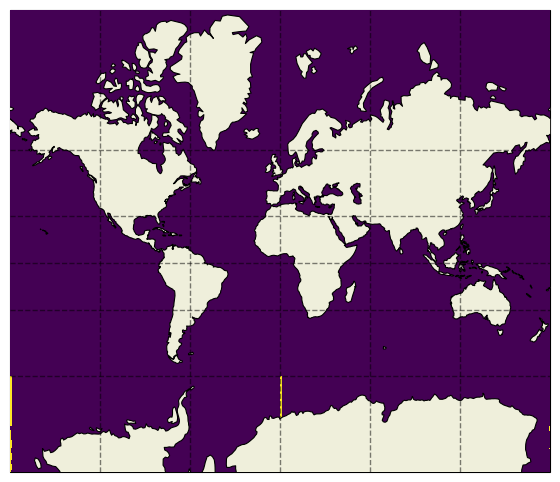

In [257]:
plt.figure(figsize=(12,6))
ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,maskC_tot,cmap='viridis',projection_type='Mercator',user_lon_0=0);

In [258]:
%%time
PSI = ecco.calc_section_stf(
    ds,maskW=maskW_tot, maskS=maskS_tot, section_name= f"PSI at {latitudes[0]} latitude" ).compute()
OUTPUT_DIR = os.path.join(DIR, "GTC/streamfunctions_ecco")
PSI.to_netcdf(os.path.join(OUTPUT_DIR, f'PSI_{latitudes[0]}.nc'))

CPU times: total: 1min 54s
Wall time: 4min 39s


In [250]:
latitudes[0]

-55

In [251]:
PSI = xr.open_dataset(os.path.join(OUTPUT_DIR, 'PSI_-55.nc'))
PSI

<xarray.Dataset>
Dimensions:  (k: 50, time: 312, i_g: 90, j: 90, tile: 13, i: 90, j_g: 90)
Coordinates:
    Z        (k) float32 ...
  * k        (k) int32 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * time     (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T06:00:00
  * i_g      (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * tile     (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
Data variables:
    trsp_z   (time, k) float64 ...
    psi_moc  (time, k) float64 ...
    moc      (time) float64 ...
    maskW    (tile, j, i_g) int32 ...
    maskS    (tile, j_g, i) int32 ...
Attributes:
    name:     PSI at -55 latitude

In [252]:
def osnap_depth_stf_vs_time(stf_ds,label):
    fig = plt.figure(figsize=(18,6))

    # Time evolving
    plt.subplot(1,4,(1,3))
    time_edge_extrap = np.hstack((stf_ds['time'].values[0] - (0.5*np.diff(stf_ds['time'].values[0:2])),\
                                  stf_ds['time'].values[:-1] + (0.5*np.diff(stf_ds['time'].values)),\
                                  stf_ds['time'].values[-1] + (0.5*np.diff(stf_ds['time'].values[-2:]))))
    Z_edge_extrap = np.hstack((np.array([0]),\
                               stf_ds['Z'].values[:-1] + (0.5*np.diff(stf_ds['Z'].values)),\
                               np.array([-6134.5])))
    plt.pcolormesh(time_edge_extrap,Z_edge_extrap,stf_ds['psi_moc'].T)
    plt.title('ECCOv4r4\nOverturning streamfunction across OSNAP %s [Sv]' % label)
    plt.ylabel('Depth [m]')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    cb = plt.colorbar()
    cb.set_label('[Sv]')

    plt.subplot(1,4,4)
    plt.plot(stf_ds['psi_moc'].mean('time'),stf_ds['Z'])
    plt.title('ECCOv4r4\nTime mean streamfunction, OSNAP %s' % label)
    plt.ylabel('Depth [m]')
    plt.xlabel('[Sv]')
    plt.grid()
    plt.show()

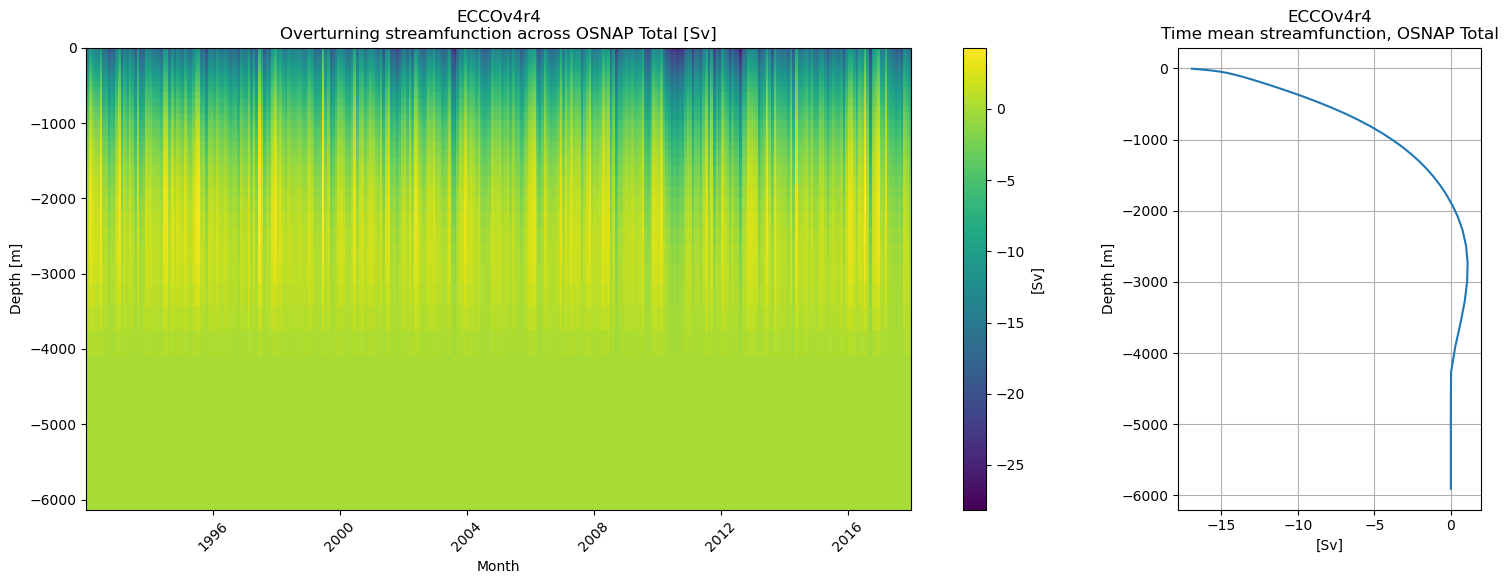

In [253]:
osnap_depth_stf_vs_time(PSI,'Total')

In [98]:
PSI_mean = PSI['psi_moc'].mean('time')
max_index = PSI_mean.argmax(dim='k')
print(max_index)
print(PSI_mean.isel(k=max_index))

PSI_STRF = PSI.isel(k=max_index)
PSI_STRF

<xarray.DataArray 'psi_moc' ()>
array(30)
<xarray.DataArray 'psi_moc' ()>
array(14.22182961)
Coordinates:
    Z        float32 -1.206e+03
    k        int32 30


<xarray.Dataset>
Dimensions:  (time: 285, i_g: 90, j: 90, tile: 13, i: 90, j_g: 90)
Coordinates:
    Z        float32 -1.206e+03
    k        int32 30
  * time     (time) datetime64[ns] 1992-01-16T18:00:00 ... 2015-12-16T12:00:00
  * i_g      (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * tile     (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
Data variables:
    trsp_z   (time) float64 -0.387 -0.4463 -0.36 ... -0.3434 -0.3092 -0.2121
    psi_moc  (time) float64 14.74 14.33 17.31 16.79 ... 14.57 13.63 15.51 12.24
    moc      (time) float64 14.77 14.45 17.35 16.83 ... 14.62 13.67 15.52 12.24
    maskW    (tile, j, i_g) int32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    maskS    (tile, j_g, i) int32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    name:     PSI at 26.5 latitude

In [99]:
PSI_MAX = PSI['psi_moc'].max(dim='k')
PSI_MAX

<xarray.DataArray 'psi_moc' (time: 285)>
array([14.77489342, 14.44504171, 17.34528088, 16.82908166, 16.97689844,
       16.19275386, 17.03092659, 18.37859598, 17.64825657, 19.18184978,
       19.51539651, 17.49875375, 16.70537283, 17.55856867, 14.10847762,
       16.34779801, 14.83394073, 15.16938857, 15.93510532, 16.53368041,
       16.53285742, 17.21877233, 18.19230489, 17.9544966 , 19.32191306,
       14.04327445, 14.13499921, 16.04338399, 12.94206773, 14.34597653,
       16.18447305, 15.83496013, 13.51364582, 14.79389761, 15.45567088,
       15.94767386, 15.52438095, 13.93471705, 12.88551898, 12.6370434 ,
       11.74443404, 14.21503365, 14.69930933, 15.46495547,  8.99967219,
       13.72323432, 13.46950739, 11.95808119, 12.15067341, 14.31632233,
       14.3947489 , 15.65495055, 16.70205842, 15.20130213, 15.69319426,
       18.22586319, 13.49795989, 12.73283516, 15.79413285, 13.26994677,
        8.70378541, 14.69421881, 12.84256912, 13.96380603, 15.19998364,
       14.2000015 , 14.53410927, 15.96590131, 10.76234297, 15.31586426,
       12.37935064, 14.50533475, 13.8695927 , 12.59400193, 14.35996638,
       15.86860571, 17.16308783, 17.26222902, 17.34744375, 18.45178103,
       16.39452805, 17.94739375, 13.76948209, 11.67672315, 12.56798826,
       13.50389029, 13.98293036, 14.69534195, 15.04167379, 15.2772311 ,
       16.07513216, 19.98299894, 14.72269133, 13.1770383 , 17.90364364,
       13.25934066, 11.76151687, 12.41183701, 13.21810185, 13.89426155,
...
       15.38726125, 16.68024618, 15.75960077, 16.75781476, 16.29900048,
       13.0229798 , 15.73931501, 12.45628507, 11.72029833, 13.1175352 ,
       15.18479133, 15.72706815, 14.7559306 , 14.37270043, 17.98124939,
       15.60775611, 10.18057974, 10.32656696, 12.712527  , 12.2959511 ,
       14.37433088, 13.01064166, 14.57989348, 15.58550978, 15.12550405,
       13.83957506, 14.58598562,  6.82414628,  6.95497233,  2.89766684,
        8.25823344,  9.1552971 , 12.33549883, 14.75821494, 14.93266378,
       13.51760315, 16.49480496, 14.65351435, 13.43892206,  5.99632471,
       10.40244993, 11.51300539, 11.88580563, 14.05593855, 14.62141509,
       14.22428984, 14.70903197, 13.68993934, 14.2631508 , 16.73997878,
       17.13010504, 16.95094699, 14.55615828, 10.69477469, 12.62961391,
       12.86999366, 10.71437885, 10.99146498, 14.67330367, 14.34802555,
       14.68007895, 13.51149512, 15.91627984, 12.68174112, 11.68844269,
       11.53020776,  3.54818733, 12.94170864, 14.41879443, 14.2401595 ,
       14.05376222, 14.4515013 , 14.56625676, 13.04813321, 16.88942497,
       13.13341523, 14.16580824, 11.17067963,  9.75281109,  9.61869456,
       11.08879167, 11.04059358, 13.31118816, 11.76176474, 12.71269593,
       12.35893173, 11.4459972 , 16.25089888, 14.65747493, 10.44394158,
       13.46514829, 10.89786086, 12.89569469, 10.90914452, 12.45022264,
       15.0331696 , 14.6191929 , 13.66949822, 15.51724027, 12.23887819])
Coordinates:
  * time     (time) datetime64[ns] 1992-01-16T18:00:00 ... 2015-12-16T12:00:00

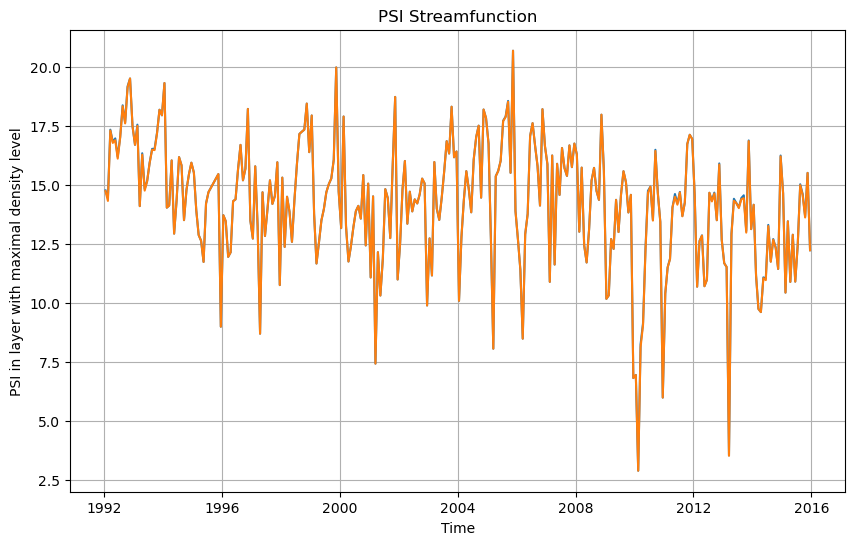

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Assuming 'time' is a coordinate in your max_psi_per_timestep DataArray
plt.plot(PSI_MAX['time'], PSI_MAX)
plt.plot(PSI_STRF['time'], PSI_STRF['psi_moc'])
plt.xlabel('Time')
plt.ylabel('PSI in layer with maximal density level')
plt.title('PSI Streamfunction')
plt.grid(True)
plt.show()

In [15]:
ecco_densities = xr.open_mfdataset(os.path.join(ECCO_dir,'*DENS_STRAT*','*.nc'))
ecco_densities

<xarray.Dataset>
Dimensions:         (time: 288, Z: 50, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 1992-01-16T18:00:00 ... 2015-12-16T...
  * Z               (Z) float32 -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    latitude_bnds   (latitude, nv) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
    longitude_bnds  (longitude, nv) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
    Z_bnds          (Z, nv) float32 dask.array<chunksize=(50, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    RHOAnoma        (time, Z, latitude, longitude) float32 dask.array<chunksize=(1, 25, 180, 360), meta=np.ndarray>
    DRHODR          (time, Z, latitude, longitude) float32 dask.array<chunksize=(1, 25, 180, 360), meta=np.ndarray>
    PHIHYD          (time, Z, latitude, longitude) float32 dask.array<chunksize=(1, 25, 180, 360), meta=np.ndarray>
Attributes: (12/62)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on a regular lat-lon gri...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Density, Stratification, and ...
    uuid:                            0824bf72-415a-11eb-be7a-0cc47a3f6953

In [18]:
specific_lat_data = ecco_densities.sel(latitude=-26.5, method='nearest')
specific_lat_data

<xarray.Dataset>
Dimensions:         (time: 288, Z: 50, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 1992-01-16T18:00:00 ... 2015-12-16T...
  * Z               (Z) float32 -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
    latitude        float32 -26.25
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    latitude_bnds   (nv) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    longitude_bnds  (longitude, nv) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
    Z_bnds          (Z, nv) float32 dask.array<chunksize=(50, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    RHOAnoma        (time, Z, longitude) float32 dask.array<chunksize=(1, 25, 360), meta=np.ndarray>
    DRHODR          (time, Z, longitude) float32 dask.array<chunksize=(1, 25, 360), meta=np.ndarray>
    PHIHYD          (time, Z, longitude) float32 dask.array<chunksize=(1, 25, 360), meta=np.ndarray>
Attributes: (12/62)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on a regular lat-lon gri...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Density, Stratification, and ...
    uuid:                            0824bf72-415a-11eb-be7a-0cc47a3f6953

In [24]:
section_of_interest = specific_lat_data.sel(longitude=slice(longitudes[0], longitudes[-1]))

In [25]:
section_of_interest

<xarray.Dataset>
Dimensions:         (time: 288, Z: 50, longitude: 164, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 1992-01-16T18:00:00 ... 2015-12-16T...
  * Z               (Z) float32 -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
    latitude        float32 -26.25
  * longitude       (longitude) float32 -96.25 -95.75 -95.25 ... -15.25 -14.75
    time_bnds       (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    latitude_bnds   (nv) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    longitude_bnds  (longitude, nv) float32 dask.array<chunksize=(164, 2), meta=np.ndarray>
    Z_bnds          (Z, nv) float32 dask.array<chunksize=(50, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    RHOAnoma        (time, Z, longitude) float32 dask.array<chunksize=(1, 25, 164), meta=np.ndarray>
    DRHODR          (time, Z, longitude) float32 dask.array<chunksize=(1, 25, 164), meta=np.ndarray>
    PHIHYD          (time, Z, longitude) float32 dask.array<chunksize=(1, 25, 164), meta=np.ndarray>
Attributes: (12/62)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on a regular lat-lon gri...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Density, Stratification, and ...
    uuid:                            0824bf72-415a-11eb-be7a-0cc47a3f6953